In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import spikeinterface.full as si
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import savemat
import shutil

In [6]:
measims_dir = Path("~/proj/measims/recordings").expanduser()
measims = list(measims_dir.glob("*.h5"))
[p.name for p in measims]

['Neuropixels-128_non-rigid_bimodal_homogeneous.h5',
 'Neuropixels-128_non-rigid_uniform_homogeneous.h5',
 'Neuropixels-128_non-rigid_bimodal_modulated.h5',
 'Neuropixels-128_bumps_bimodal_homogeneous.h5',
 'Neuropixels-128_bumps_uniform_modulated.h5',
 'Neuropixels-128_non-rigid_uniform_modulated.h5',
 'Neuropixels-128_bumps_uniform_homogeneous.h5',
 'Neuropixels-128_bumps_bimodal_modulated.h5',
 'Neuropixels-128_static_uniform_homogeneous.h5',
 'Neuropixels-128_static_bimodal_homogeneous.h5',
 'Neuropixels-128_static_uniform_modulated.h5',
 'Neuropixels-128_rigid_bimodal_homogeneous.h5',
 'Neuropixels-128_rigid_uniform_modulated.h5',
 'Neuropixels-128_static_bimodal_modulated.h5',
 'Neuropixels-128_rigid_uniform_homogeneous.h5',
 'Neuropixels-128_rigid_bimodal_modulated.h5']

In [31]:
scaleprocs_dir = Path("~/proj/measims/scaleproc_recordings").expanduser()

In [32]:
darts_dir = Path("~/proj/measims/dart_recordings").expanduser()

In [10]:
rec, sorting = si.read_mearec(measims[0])

In [11]:
rec

MEArecRecordingExtractor: 128 channels - 32.0kHz - 1 segments - 19,200,000 samples 
                          600.00s (10.00 minutes) - float32 dtype - 9.16 GiB
  file_path: /home/cwindolf/proj/measims/recordings/Neuropixels-128_non-rigid_bimodal_homogeneous.h5

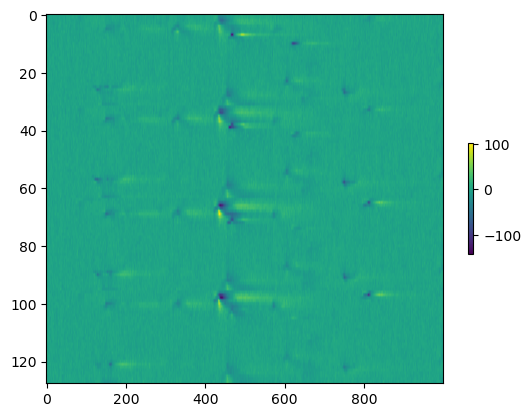

In [20]:
ta = rec.get_traces(0, 0, 1000)
plt.imshow(ta.T, aspect="auto"); plt.colorbar(shrink=0.3)

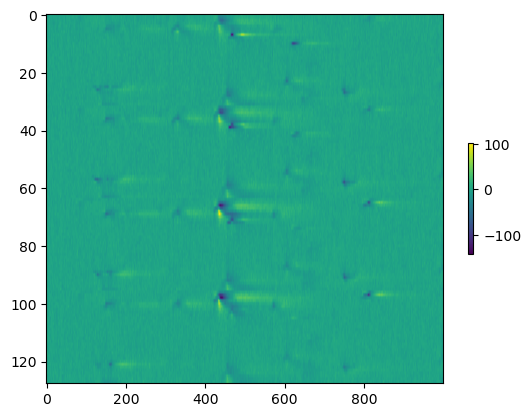

In [25]:
rec_sp = si.scale(rec, gain=200.0)
tb = rec_sp.astype(np.int16).get_traces(0, 0, 1000) / 200.0
plt.imshow(tb.T, aspect="auto"); plt.colorbar(shrink=0.3)

In [28]:
np.abs(ta - tb).max()

0.0025001525878902697

In [30]:
np.abs(ta).max(), np.abs(tb).max()

(142.48755, 142.49)

In [42]:
for p in measims:
    print(p.stem)
    rec0, sorting = si.read_mearec(p)
    if (scaleprocs_dir / p.stem).exists():
        shutil.rmtree(scaleprocs_dir / p.stem)
    if (darts_dir / p.stem).exists():
        shutil.rmtree(darts_dir / p.stem)

    # read and scaleproc for Matlab KS, and dump chanMaps
    rec_scaleproc = si.scale(rec0, gain=200.0)
    rec_scaleproc = rec_scaleproc.astype(np.int16)
    rec_scaleproc.save_to_folder(scaleprocs_dir / p.stem, n_jobs=8)
    chanMap = dict(
        xcoords=rec0.get_channel_locations()[:, 0][None],
        ycoords=rec0.get_channel_locations()[:, 1][None],
        kcoords=np.ones(rec0.get_num_channels())[None],
        chanMap=1+np.arange(rec0.get_num_channels())[None],
        chanMap0ind=np.arange(rec0.get_num_channels())[None],
    )
    savemat(scaleprocs_dir / p.stem / "kilosortChanMap.mat", chanMap)

    # pre-bake a basic preprocessing for dartsort
    rec_dart = si.highpass_filter(rec0)
    rec_dart = si.common_reference(rec_dart)
    rec_dart = si.zscore(rec_dart, num_chunks_per_segment=100, mode="mean+std")
    rec_dart.save_to_folder(darts_dir / p.stem, n_jobs=8)

Neuropixels-128_non-rigid_bimodal_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_non-rigid_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_non-rigid_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_non-rigid_uniform_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_non-rigid_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_bumps_bimodal_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_bumps_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_bumps_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_bumps_uniform_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_bumps_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_bumps_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_bumps_uniform_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_bumps_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_bumps_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_bumps_bimodal_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_bumps_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_bumps_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_static_uniform_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_static_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_static_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_static_bimodal_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_static_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_static_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_static_uniform_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_static_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_static_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_rigid_bimodal_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_rigid_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_rigid_bimodal_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_rigid_uniform_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_rigid_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_rigid_uniform_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_static_bimodal_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_static_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_static_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_rigid_uniform_homogeneous
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_rigid_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_rigid_uniform_homogeneous
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Neuropixels-128_rigid_bimodal_modulated
Use cache_folder=/home/cwindolf/proj/measims/scaleproc_recordings/Neuropixels-128_rigid_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

Use cache_folder=/home/cwindolf/proj/measims/dart_recordings/Neuropixels-128_rigid_bimodal_modulated
write_binary_recording with n_jobs = 8 and chunk_size = 32000


write_binary_recording:   0%|          | 0/600 [00:00<?, ?it/s]

In [43]:
1

1

In [6]:
import MEArec
from pathlib import Path

In [7]:
th5 = Path("~/proj/measims/templates/templates_Neuropixels-128.h5").expanduser()
gen = MEArec.load_templates(th5)

In [10]:
gen.locations

<HDF5 dataset "locations": shape (1300, 100, 3), type "<f8">